# 404 左叶子之和
计算所有给定二叉树的左叶子之和  

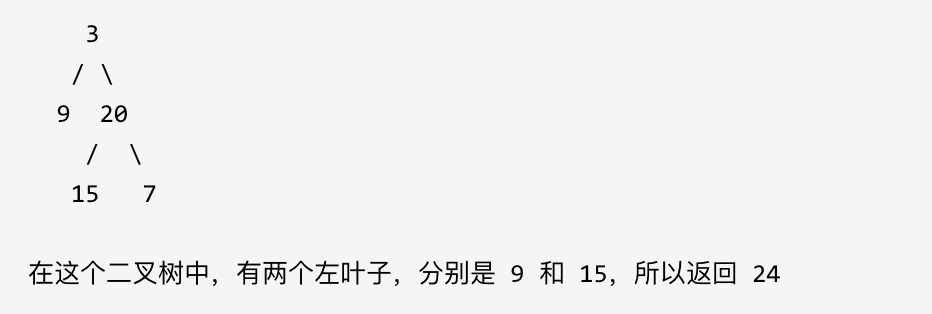

## 思路
注意要判断的是左叶子，而不是所有左节点  
- 先满足 **叶子**（左右孩子为空）  
- 然后该节点必须是某个节点的 **左孩子**

左叶子：节点A的左孩子不为空，且左孩子的左右孩子都为空，那么A节点的左孩子是一个左叶子

通过定义也很明确了，必须借助父节点才能判断左叶子

整体的思路还是自顶向下的，所以还是后序遍历（类似于求深度）

### 递归法
1. 参数和返回值：
   - 参数：根节点
   - 返回值：存放左叶子之和的 int

2. 终止条件  
   - 遍历到空节点，那么这个节点的左叶子之和一定是0  
   - 只有当前的节点是一个父节点，才能判断其左孩子是不是左叶子  
   - 如果遍历到叶子节点，其左孩子之和肯定也是0

3. 单层递归逻辑    
   - 遇到左叶子节点，记录当前数值  
   - 递归求左子树的左叶子之和，以及右子树的左叶子之和  
   - 二者相加即为整个树的左叶子之和

### 迭代法
判断逻辑是一样的，前中后序遍历都可

In [ ]:
# 递归法
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def sumOfLeftLeaves(self, root:TreeNode) -> int:
        # 排除 空树 和 当前节点是叶子节点 的情况
        if root is None:
            return 0
        if root.left is None and root.right is None:
            return 0
        
        # 递归计算左子树的左叶子之和
        leftValue = sumOfLeftLeaves(root.left)
        # 如果当前节点的左孩子就是叶子节点，那么满足左叶子条件，累计值
        if root.left and not root.left.left and not root.left.right:
            leftValue = root.left.val
        
        # 递归计算右子树的左叶子之和，直接递归即可
        rightValue = sumOfLeftLeaves(root.right)
        
        sumValue = leftValue + rightValue

        return sumValue